In [31]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
dfs = []
# loop over the list of csv files
for f in csv_files:
    # filename = f.split("\\")[-1]
    # year = re.findall(r"\d+", filename)[-1]
    # if year in ['2015','2016','2017','2018', '2019', '2020']:
    # read the csv file
    df = pd.read_csv(f)
    dfs.append(df)

In [3]:
# concatenate all data
df = dfs[0].merge(dfs[1], left_on=['state', 'year'], right_on=['state', 'year'])
for i in range(2, 7):
    df = df.merge(dfs[i], left_on=['state', 'year'], right_on=['state', 'year'])

In [4]:
df.shape

(500, 14)

In [5]:
df.head()

,state,education,year,proportion of women,Position_Governor,Position_Lt. Governor,labour_force_participation,mngmt_job_wage_gap,"over 25 years \bach degree ,wage gap,k",legality,ab_rate,rape_rate,life_exp_m_f,sex_ratio
0,Alabama,1.180,2020,0.157,1.0,0.0,0.782,0.640,25.1,0,6.0,32.7,0.918,93.6
1,Alaska,1.014,2020,0.367,0.0,0.0,0.795,0.779,18.1,1,8.6,154.8,0.938,109.2
2,Arizona,1.112,2020,0.389,0.0,0.0,0.789,0.701,23.2,1,9.3,44.0,0.923,98.8
3,Arkansas,1.115,2020,0.259,0.0,0.0,0.837,0.705,20.1,0,5.6,73.5,0.928,96.4
4,California,1.099,2020,0.308,0.0,1.0,0.764,0.734,18.6,1,19.2,34.2,0.929,98.9


In [14]:
df.columns

Index(['state', 'education', 'year', 'proportion of women',
       'Position_Governor', 'Position_Lt. Governor',
       'labour_force_participation', 'mngmt_job_wage_gap',
       'over 25 years \bach degree ,wage gap,k', 'legality', 'ab_rate',
       'rape_rate', 'life_exp_m_f', 'sex_ratio'],
      dtype='object')

In [10]:
df = df.rename(columns={"proportion of women": "state_legislature",
                   "Position_Governor": "governor",
                   "Position_Lt. Governor": "lt_governor",
                   r"over 25 years \bach degree ,wage gap,k": "bachelor_wage_gap",
                   'legality': "ab_legality",
                   'sex_ratio': "sex_ratio_birth"})


In [11]:
# convert male/female to f/m
df['life_exp_f_m'] = 1 / df['life_exp_m_f'] 
df['sex_ratio_birth'] = 1 / (df['sex_ratio_birth'] / 100)
df = df.drop(['life_exp_m_f'], axis=1)

In [12]:
# convert to female - male
df['bachelor_wage_gap'] = -df['bachelor_wage_gap']

In [13]:
df.columns

Index(['state', 'education', 'year', 'state_legislature', 'governor',
       'lt_governor', 'labour_force_participation', 'mngmt_job_wage_gap',
       'bachelor_wage_gap', 'ab_legality', 'ab_rate', 'rape_rate',
       'sex_ratio_birth', 'life_exp_f_m'],
      dtype='object')

In [28]:
# combine governor and lt_governor as state_gov
df['state_gov'] = np.where((df['governor'] == 1) | (df['lt_governor'] == 1), 1, 0)
df = df.drop(['governor','lt_governor'], axis=1)

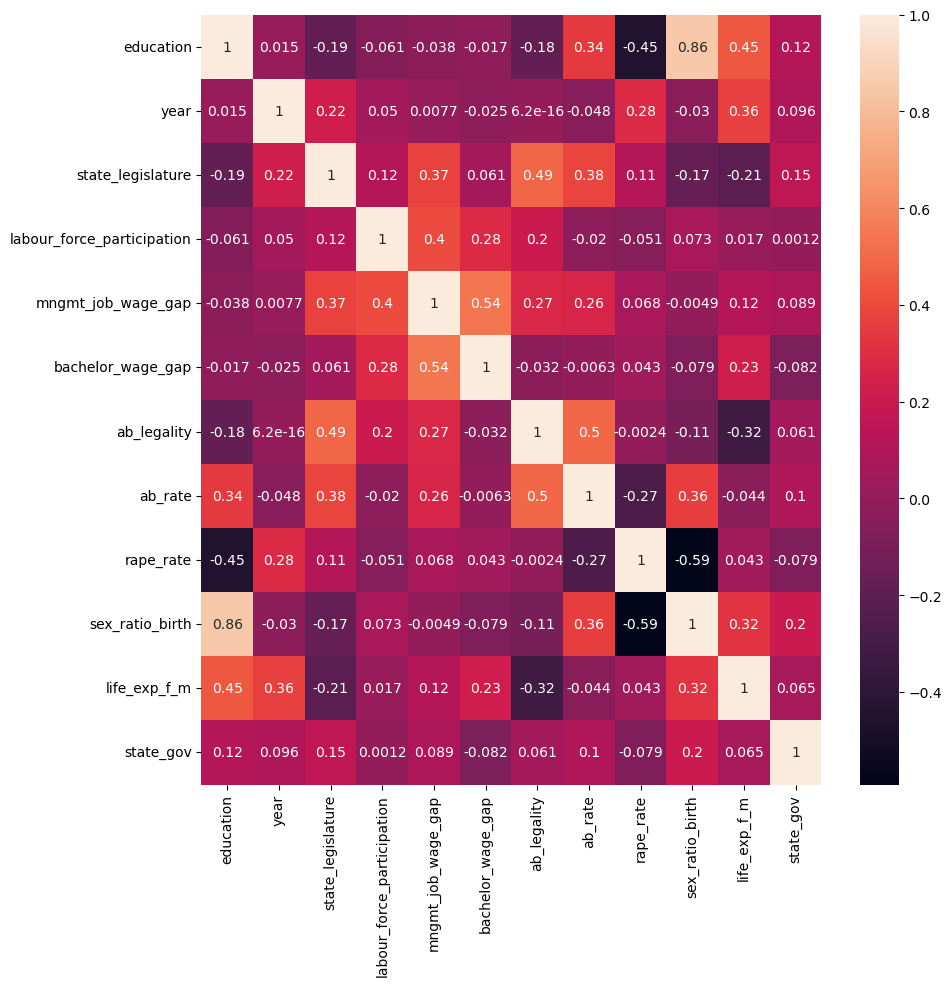

In [32]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [33]:
# drop sex_ratio_birth and mngt_job_wage_gap
df = df.drop(['sex_ratio_birth','mngmt_job_wage_gap'], axis=1)

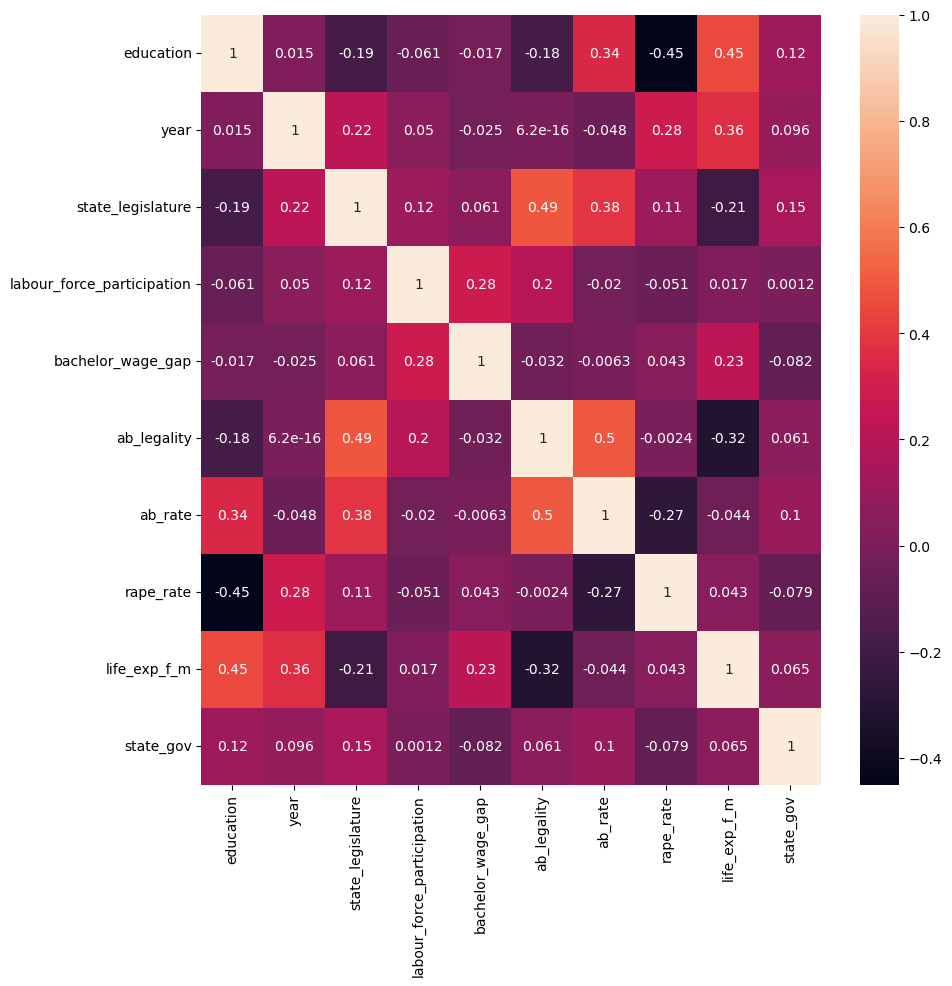

In [34]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

In [35]:
df.to_csv('all_data.csv', index=False)